C:/Users/dou/Documents/chest_xray/train
(251, 320, 3)


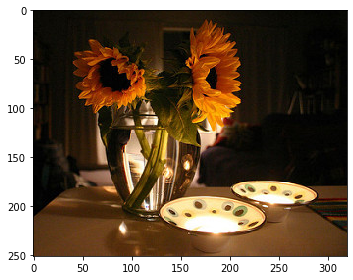

In [1]:
train_root  = "C:/Users/dou/Documents/chest_xray/train"
test_root = "C:/Users/dou/Documents/chest_xray/test"
print(train_root)

from skimage import io
image = io.imread("C:/Users/dou/Documents/flowers_test/Training/sunflower/39271782_b4335d09ae_n.jpg")
print(image.shape)
io.imshow(image)

batch_size = 16

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

#optional


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


2


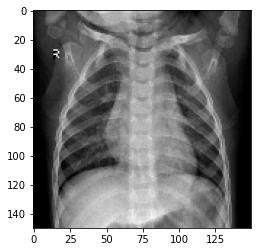

In [3]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)


In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=5)


Epoch 1/5
326/326 [==============================] - 85s 259ms/step - loss: 1.2671 - accuracy: 0.7548
Epoch 2/5
326/326 [==============================] - 88s 271ms/step - loss: 0.4672 - accuracy: 0.8110
Epoch 3/5
326/326 [==============================] - 88s 271ms/step - loss: 0.4727 - accuracy: 0.8230
Epoch 4/5
326/326 [==============================] - 90s 275ms/step - loss: 0.3150 - accuracy: 0.8731
Epoch 5/5
326/326 [==============================] - 89s 271ms/step - loss: 0.2233 - accuracy: 0.9143


In [8]:
score = model.evaluate(test_data)
print(score)


20/20 [==============================] - 8s 415ms/step - loss: 1.8911 - accuracy: 0.7051
[1.8910751342773438, 0.7051281929016113]


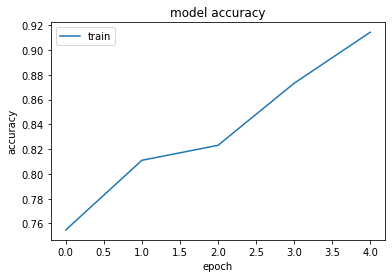

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

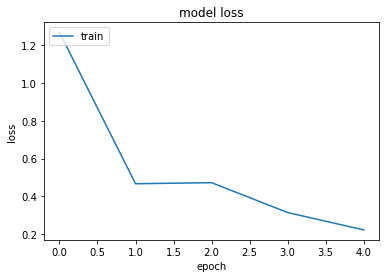

In [7]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [19]:
#Alternatively if predict_classes module not there:
import numpy as np
predict_x=model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)


39/39 [==============================] - 5s 113ms/step


<AxesSubplot:>

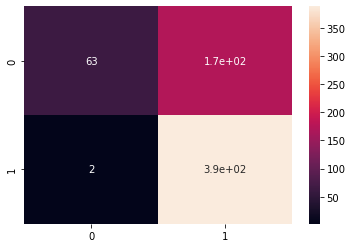

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [21]:
#depends on number of classes
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.7227564102564102


In [22]:
from keras.models import save_model
save_model(model, "Pneumonia")

INFO:tensorflow:Assets written to: Pneumonia\assets


INFO:tensorflow:Assets written to: Pneumonia\assets


In [23]:
from keras.models import load_model
from PIL import Image #use PIL
import numpy as np

model = load_model("Pneumonia")


In [24]:
import cv2
image = cv2.imread("C:/Users/dou/Documents/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.merge([gray,gray,gray])

In [25]:
img.resize((150,150,3))
img = np.asarray(img, dtype="float32") #need to transfer to np to reshape
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2]) #rgb to reshape to 1,100,100,3
img.shape
print(model.predict(img))#1：abnormal 2：normal

1/1 [==============================] - 0s 232ms/step
[[0.03563043 0.96436954]]
